# Loading Data

In [1]:
import pandas as pd

In [2]:
tweet = pd.read_csv('C:/WinPython_64bit/notebooks/Kapita Selekta/Scrapping Tweet/TweetClean.csv')
tweet.head()

,Unnamed: 0,Tweet,TweetClean_NonPT,TweetClean_PT
0,0,Udah ngeh blm min?\r\nItu sms 86mb jam 16.06 t...,sadar min sms 86 mb jam 16.06 tanggal 30.01 ke...,sadar min sms mb jam tanggal kemarin paketin t...
1,1,Dibaca itu yang kemarin min 86 mb... Pas jam 1...,dibaca kemarin min 86 mb .. jam 16.06 paketin ...,dibaca kemarin min mb jam paketin
2,2,@IndosatCare pusing saya min pake indosat... \...,pusing min pakai .. kuota kesedot,pusing min kuota
3,3,"Sudah min sudah, lagian apa yang mau di clear ...",min clear cache .. dibilang diuninstal diinsta...,min dibilang diuninstal diinstal sebulan min k...
4,4,"@IndosatCare masi juga lelet euy,, apakah bts ...",masi lelet euy bts bermasalah didaerah karna k...,masi didaerah karna kantor


In [3]:
listTweet=tweet['TweetClean_PT'].values.astype('U')
listTweet = [d for d in listTweet]

# MODEL VSM TFIdf

In [4]:
#Pembentukan Model VSM tanpa PosTag

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=5)
X = Tfidf_vectorizer.fit_transform(listTweet)
X_term = Tfidf_vectorizer.get_feature_names()
print(X.shape)

(4359, 591)


In [5]:
import numpy as np
#menghapus tfidf yang bernilai 0
nidx = np.array(range(len(listTweet)))
nidx = nidx[X.getnnz(1)>0] # Remove Zero Rows
data_bersih = [listTweet[i] for i in nidx]
X = X[X.getnnz(1)>0] # Remove Zero Rows
X_terms = Tfidf_vectorizer.get_feature_names()
print(X.shape)

(4295, 591)


# Percobaan berbagai Model

## K-Means ++

In [6]:
from sklearn import cluster
from tqdm import tqdm

seed = 99 #harus ditetapkan untuk mengoptimalkan cost function 
#atau untuk konvergen lebih cepat aja dalam pengelompokannya, 
#tidak ada hubungan antara nilai pasti dari seed dan hasil pengelompokan KMeans
#seed ini harus ditentukan terlebih dahulu agar tidak menghasilkan pengelompokan yg berbeda setiap dijalankan aja
C=[]
K=[] 
kelompok = []
for k in tqdm(range(2,9)):
    kelompok.append(k)
    kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = seed)
    K.append(kmPP.fit(X))
    C.append(kmPP.predict(X))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:35<00:00, 22.25s/it]


In [7]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means/menggunakan centroid
from sklearn.metrics import silhouette_score as siluet

ScoreSiluet=[]
i=int(kelompok[0])
for res in C:
    ScoreSiluet.append(siluet(X,res))
    print("K={} ,nilai siluet {} ".format(i, siluet(X,res)))
    i=i+1
print("dengan score terbesar {}".format(max(ScoreSiluet)))    

K=2 ,nilai siluet 0.058156624408397556 
K=3 ,nilai siluet 0.0549041726642852 
K=4 ,nilai siluet 0.05761709233662597 
K=5 ,nilai siluet 0.059196661493624105 
K=6 ,nilai siluet 0.06268551328476488 
K=7 ,nilai siluet 0.06897955098043054 
K=8 ,nilai siluet 0.07040864490259434 
dengan score terbesar 0.07040864490259434


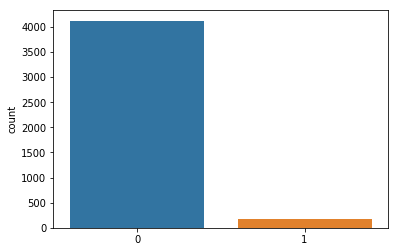

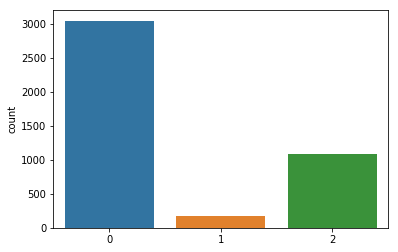

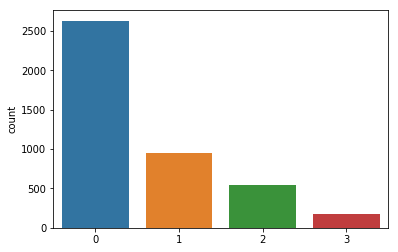

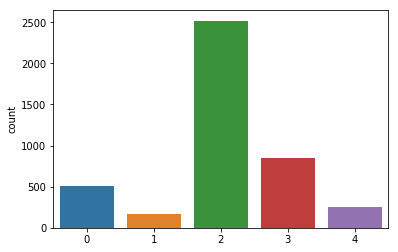

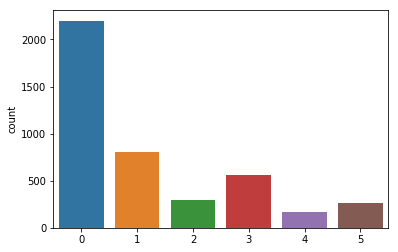

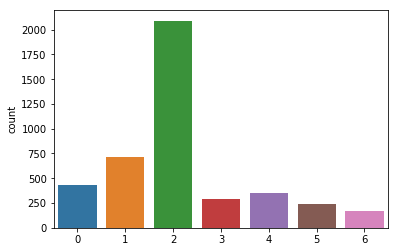

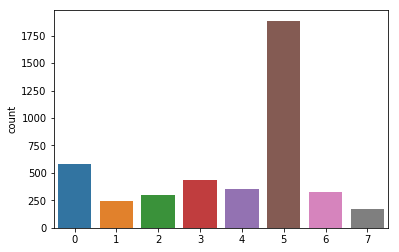

In [32]:
#dengan 9 Kluster yang menurut Evaluasi secara internal terbaik 
import seaborn as sns
import matplotlib.pyplot as plt

for i in C:
    sns.countplot(i)
    plt.show()

## Mini Batch K-Means++

In [9]:
from sklearn import cluster
from tqdm import tqdm

# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk

seed = 99 #harus ditetapkan untuk mengoptimalkan cost function 
#atau untuk konvergen lebih cepat aja dalam pengelompokannya, 
#tidak ada hubungan antara nilai pasti dari seed dan hasil pengelompokan KMeans
#seed ini harus ditentukan terlebih dahulu agar tidak menghasilkan pengelompokan yg berbeda setiap dijalankan aja
Cmb=[]
Kmb=[] 
kelompokMb = []
for k in tqdm(range(2,9)):
    kelompokMb.append(k)
    MiniBatchKM = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300,batch_size=10 , tol=0.0001, random_state = seed) 
    Kmb.append(MiniBatchKM.fit(X))
    Cmb.append(MiniBatchKM.predict(X))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:08<00:00,  1.24s/it]


In [10]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means/menggunakan centroid
from sklearn.metrics import silhouette_score as siluet

ScoreSiluet=[]
i=int(kelompok[0])
for res in Cmb:
    ScoreSiluet.append(siluet(X,res))
    print("K={} ,nilai siluet {} ".format(i, siluet(X,res)))
    i=i+1
print("dengan score terbesar {}".format(max(ScoreSiluet)))   

K=2 ,nilai siluet 0.01670407940485883 
K=3 ,nilai siluet 0.011569028503702464 
K=4 ,nilai siluet 0.02060849936065999 
K=5 ,nilai siluet 0.021948231701533472 
K=6 ,nilai siluet 0.021620375493027543 
K=7 ,nilai siluet 0.022896136512126287 
K=8 ,nilai siluet 0.009830589046259329 
dengan score terbesar 0.022896136512126287


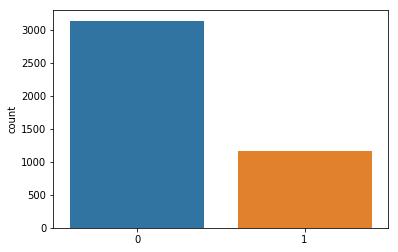

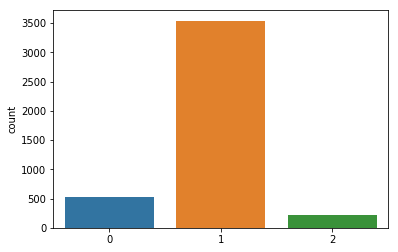

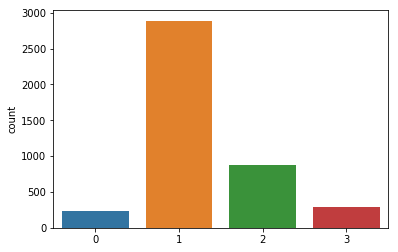

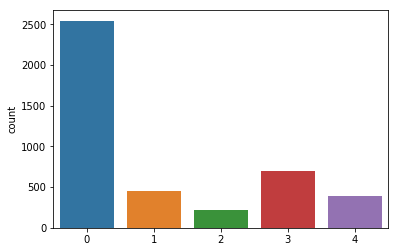

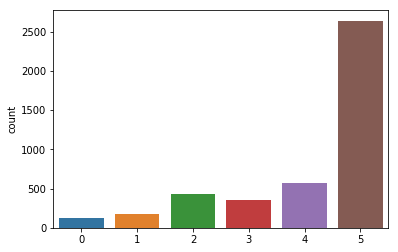

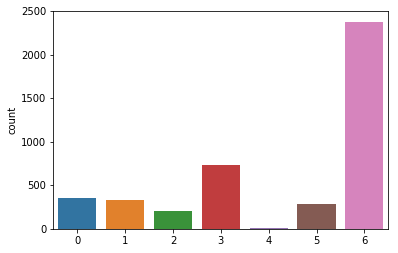

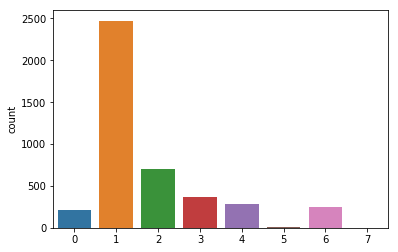

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in Cmb:
    sns.countplot(i)
    plt.show()

## DBSCAN Clustering

In [12]:
from sklearn import cluster

DBScan = cluster.DBSCAN(eps=1)
DBScan.fit(X)
C_DB = DBScan.labels_.astype(np.int)

In [13]:
siluet(X,C_DB)

0.027177410639356935

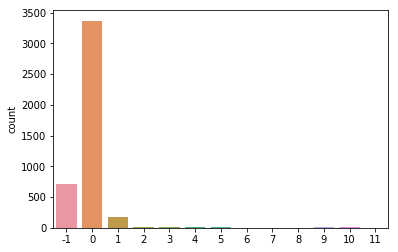

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(C_DB)
plt.show()

## LDA Clustering

In [15]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda=[]
for n_topics in tqdm(range(2,9)):
    model=LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(X)
    lda.append(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:32<00:00, 21.82s/it]


In [16]:
vsm_topics=[]
for i in tqdm(lda):
    vsm_topics.append(i.transform(X))
    #ini matriks topik terhadap masing-masing kata 

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]


In [17]:
doc_topic=[]
for i in tqdm(range(len(vsm_topics))):
    doc_topic.append([a.argmax()+1 for a in vsm_topics[i]]) # topic of docs

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.36it/s]


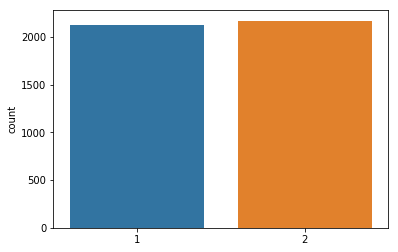

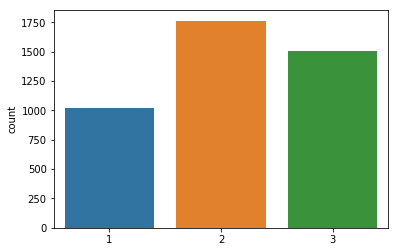

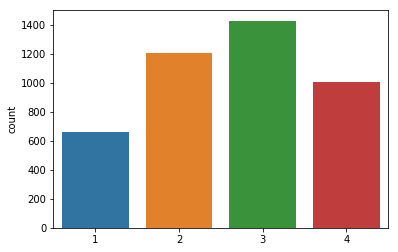

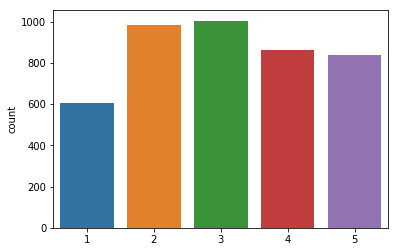

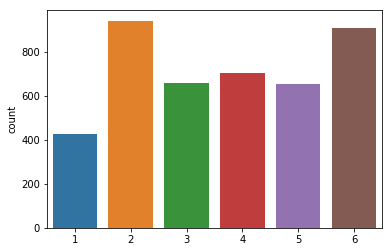

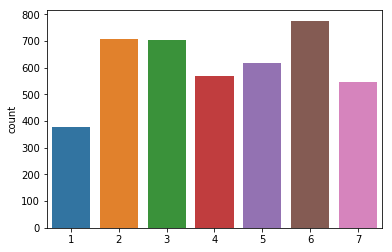

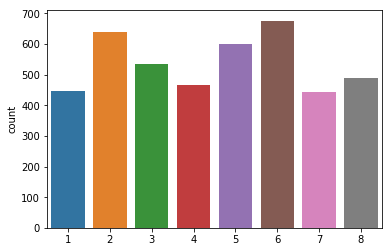

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in doc_topic:
    sns.countplot(i)
    plt.show() 

In [19]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [39]:
# Mari kita coba maknai masing-masing topic ini
Top_Words=15 #ini mau memunculkan berapa banyak kata, untuk memudahkan pendefinisian kelompok
Ntopic=4
print('Printing top {0} Topics, with top {1} Words:'.format(Ntopic, Top_Words))
print_Topics(lda[Ntopic-2], X_terms,Ntopic, Top_Words)

Printing top 4 Topics, with top 15 Words:
Topic #1:
nan min pulsa kesedot nomer ya nomor siang bantu nya kah admin telepon gini ku
Topic #2:
sinyal ya jaring min banget pulsa jam sms kah daerah kali registrasi ilang langgan jelek
Topic #3:
kuota paket pulsa internet cek min data ya rb gb sisa isi kemarin kartu sms
Topic #4:
pulsa dm langgan kak min layan ya kali respon internetan banget konsumen solusi nomor sms


In [40]:
Ntopic=4
Vectorized = Tfidf_vectorizer
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda[Ntopic-2], X, Vectorized)  

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      31.523017        1       1 -0.115753 -0.147540
1      27.316506        1       2 -0.056365  0.199357
3      23.788423        1       3 -0.075374 -0.021628
0      17.372054        1       4  0.247493 -0.030189, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
357   Default  185.000000         nan  185.000000  30.0000  30.0000
296   Default  146.000000       kuota  146.000000  29.0000  29.0000
504   Default  118.000000      sinyal  118.000000  28.0000  28.0000
402   Default  154.000000       paket  154.000000  27.0000  27.0000
219   Default   70.000000      jaring   70.000000  26.0000  26.0000
348   Default  244.000000         min  244.000000  25.0000  25.0000
263   Default   36.000000     kesedot   36.000000  24.0000  24.0000
441   Default  351.000000       pulsa  351.000000  23.0000  23.0000
379   Default   38.000000       nomer   38.000000  22.0000  22.0000
163   Default   46.000000          gb   46.000000  21.0000  21.0000
507   Default   44.000000        sisa   44.000000  20.0000  20.0000
90    Default   36.000000      daerah   36.000000  19.0000  19.0000
96    Default   85.000000        data   85.000000  18.0000  18.0000
205   Default  118.000000    internet  118.000000  17.0000  17.0000
233   Default   73.000000         kak   73.000000  16.0000  16.0000
458   Default   48.000000      respon   48.000000  15.0000  15.0000
131   Default  127.000000          dm  127.000000  14.0000  14.0000
43    Default   27.000000       bantu   27.000000  13.0000  13.0000
78    Default   98.000000         cek   98.000000  12.0000  12.0000
451   Default   62.000000          rb   62.000000  11.0000  11.0000
499   Default   36.000000       siang   36.000000  10.0000  10.0000
220   Default   31.000000       jelek   31.000000   9.0000   9.0000
23    Default   34.000000    aplikasi   34.000000   8.0000   8.0000
206   Default   27.000000  internetan   27.000000   7.0000   7.0000
515   Default   26.000000      solusi   26.000000   6.0000   6.0000
537   Default   21.000000     telepon   21.000000   5.0000   5.0000
40    Default   75.000000      banget   75.000000   4.0000   4.0000
2     Default   29.000000       admin   29.000000   3.0000   3.0000
286   Default   29.000000    konsumen   29.000000   2.0000   2.0000
293   Default   18.000000          ku   18.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
114    Topic4    8.234676       diisi    8.931324   1.6691  -5.2018
308    Topic4    7.886764      lenyap    8.591131   1.6648  -5.2450
24     Topic4    7.785098         app    8.488019   1.6639  -5.2579
428    Topic4    7.664436      posisi    8.373489   1.6618  -5.2736
63     Topic4    7.254237      blokir    7.945818   1.6592  -5.3286
274    Topic4    7.295896        klik    7.994119   1.6589  -5.3228
562    Topic4    7.047553       trims    7.740318   1.6565  -5.3575
245    Topic4    6.958781        kbps    7.656670   1.6547  -5.3701
332    Topic4    6.960797        masi    7.665171   1.6539  -5.3698
519    Topic4    6.431228        spam    7.122094   1.6483  -5.4490
320    Topic4    6.335139     makasih    7.025807   1.6468  -5.4640
74     Topic4    6.207594        call    6.907031   1.6435  -5.4844
420    Topic4    6.824275     permisi    7.597809   1.6429  -5.3897
379    Topic4   34.314230       nomer   38.338896   1.6394  -3.7746
43     Topic4   23.560670       bantu   27.255434   1.6046  -4.1506
2      Topic4   20.266131       admin   29.213440   1.3846  -4.3012
499    Topic4   24.000675       siang   36.056498   1.3433  -4.1321
348    Topic4   90.476847         min  244.826054   0.7549  -2.8050
166    Topic4   20.015303        gini   34.037684   1.2193  -4.3136
380    Topic4   24.699556       nomor   78.361437   0.5958  -4.1034
385    Topic4   22.763976    

## NMF Clustering

In [26]:
from sklearn.decomposition import NMF

nmf=[]
for n_topics in tqdm(range(2,9)):
    model=NMF(n_components=n_topics, random_state=0).fit(X)
    nmf.append(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.90it/s]


In [27]:
vsm_topics_nmf=[]
for i in tqdm(nmf):
    vsm_topics_nmf.append(i.transform(X))
    #ini matriks topik terhadap masing-masing kata 

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 149.02it/s]


In [28]:
doc_topic_nmf=[]
for i in tqdm(range(len(vsm_topics_nmf))):
    doc_topic_nmf.append([a.argmax()+1 for a in vsm_topics_nmf[i]]) # topic of docs

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 79.59it/s]


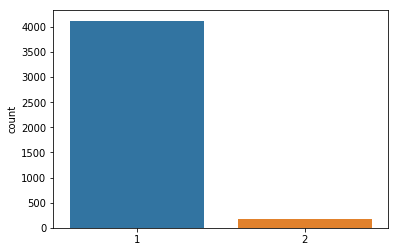

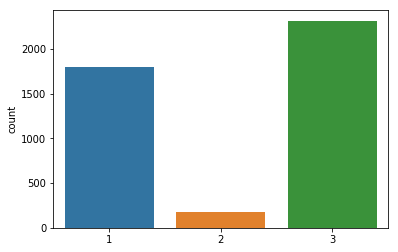

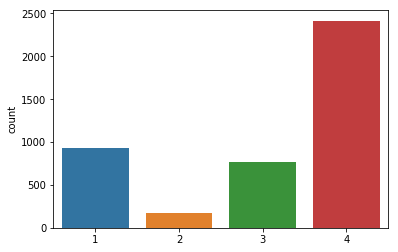

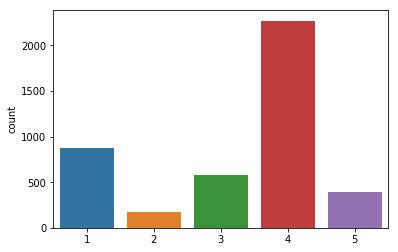

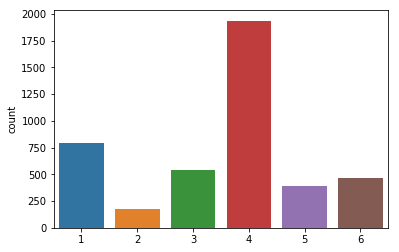

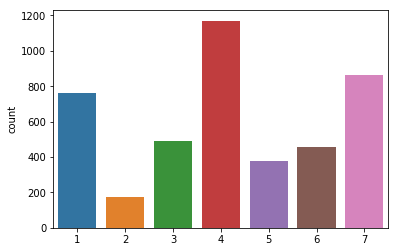

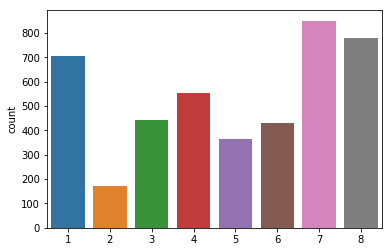

In [29]:
# mari kita plot
import matplotlib.pyplot as plt
import seaborn as sns
for i in doc_topic_nmf:
    sns.countplot(i)
    plt.show() 